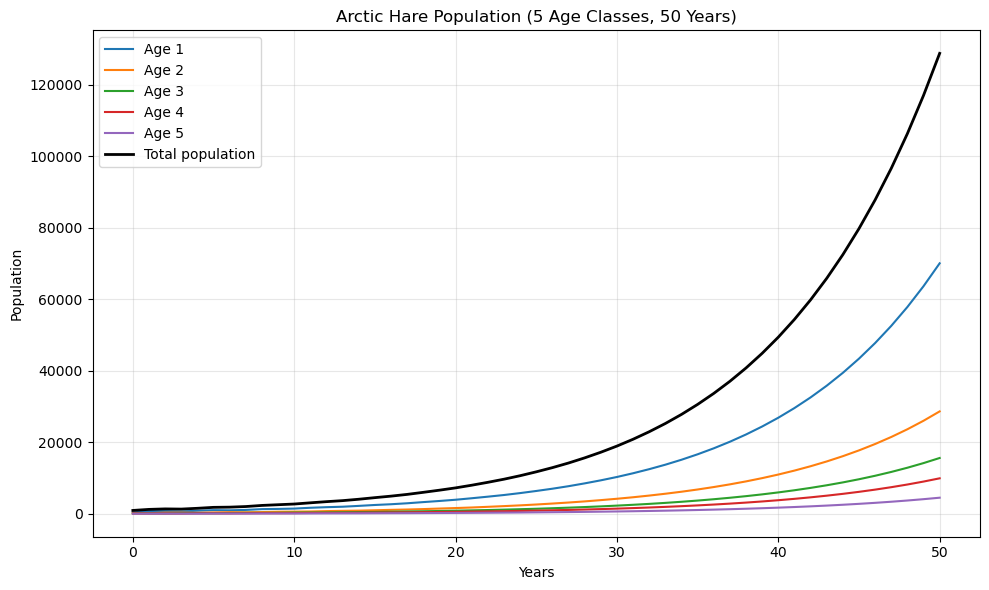

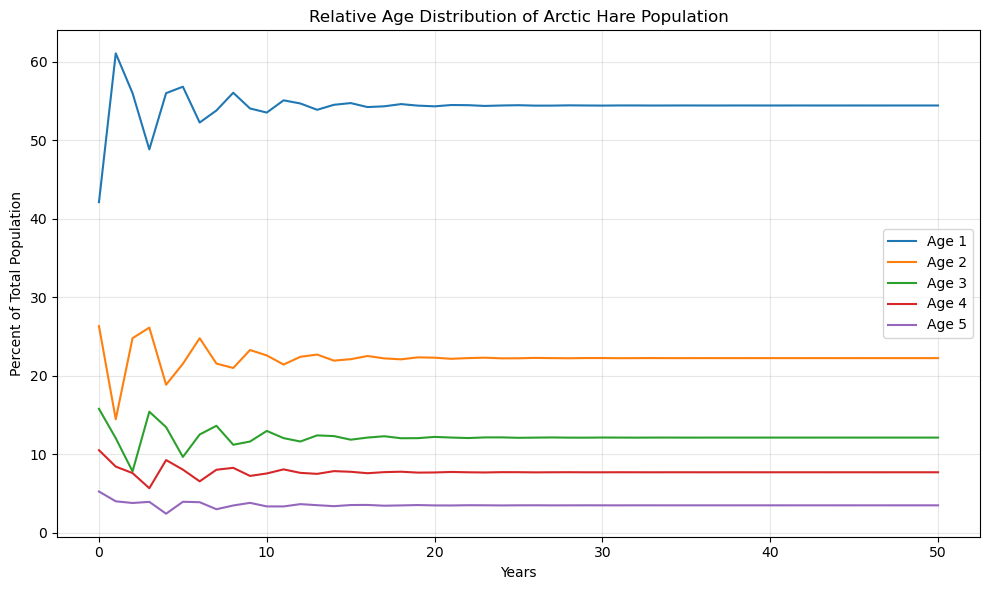

Initial total population: 950
Final total after 50 years: 128715
  Age 1: 54.4% of final population
  Age 2: 22.2% of final population
  Age 3: 12.1% of final population
  Age 4: 7.7% of final population
  Age 5: 3.5% of final population


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def age_structured_population(years, initial_ages, leslie_matrix):
    n_t = np.array(initial_ages, dtype=float)
    age_history = []
    total_history = []
    pct_by_age = []

    for _ in range(years + 1):
        age_history.append(n_t.copy())
        total = n_t.sum()
        total_history.append(total)
        pct_by_age.append((n_t / total * 100) if total > 0 else np.zeros_like(n_t))
        n_t = leslie_matrix @ n_t

    return np.array(age_history), np.array(total_history), np.array(pct_by_age)

years = 50

F1, F2, F3, F4, F5 = 0, 0, 3.0, 2.5, 1.2  

S1, S2, S3, S4 = 0.45, 0.60, 0.70, 0.50  

A = np.array([
    [F1, F2, F3, F4, F5],
    [S1, 0,  0,  0,  0 ],
    [0,  S2, 0,  0,  0 ],
    [0,  0,  S3, 0,  0 ],
    [0,  0,  0,  S4, 0 ]
])

initial_ages = [400, 250, 150, 100, 50]

age_hist, total_hist, pct_hist = age_structured_population(years, initial_ages, A)
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(age_hist[:, i], label=f'Age {i+1}')
plt.plot(total_hist, color='black', linewidth=2, label='Total population')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Arctic Hare Population (5 Age Classes, 50 Years)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(pct_hist[:, i], label=f'Age {i+1}')
plt.xlabel('Years')
plt.ylabel('Percent of Total Population')
plt.title('Relative Age Distribution of Arctic Hare Population')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print(f"Initial total population: {int(sum(initial_ages))}")
print(f"Final total after {years} years: {int(total_hist[-1])}")
for i in range(5):
    print(f"  Age {i+1}: {pct_hist[-1, i]:.1f}% of final population")


What was the real world example?
The model represents an age-structured population of Artic Hares living in tundra environments. Hares in this region typically live up to five years. Juveniles ages 1–2 have low survival rates due to harsh winters and predators, while mature adults ages 3–5 produce most of the offspring. The fecundity F and survival S rates were chosen to reflect mammal demographics under predation and limited resources.

What was the result of the 50 year model using your initial populations?
Starting with an initial total population of 950 hares, the model projected a final population of roughly 128,715 individuals after 50 years. The final age distribution was heavily skewed toward younger hares:
- Age 1: 54.4%  
- Age 2: 22.2%  
- Age 3: 12.1%  
- Age 4: 7.7%  
- Age 5: 3.5%


Describe what the transient and stable behavior of the model looked like.
In the transient phase (first 10–15 years), the population fluctuated as the different age classes adjusted to the model’s fecundity and survival rates. Early on, there was a surge of younger hares due to high birth rates, followed by smaller waves of older individuals as they matured.  
By around year 20, the population settled into a stable age distribution, where the relative proportions of each age class remained consistent even as the total population continued to grow exponentially. This stable phase represents the population’s long-term equilibrium structure under the given birth and survival values. 

